<center><h1>BONUS</h1></center>

I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.


Ram Chandra Bhavirisetty<br>
Sanjana veesam

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
peng_data=pd.read_csv("penguins_size.csv")

peng_data.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
peng_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
peng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
peng_data.shape

(344, 7)

In [ ]:
peng_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<h2>I. Data Cleaning</h2>
<p> Data cleaning by replacing NaN's Median of that column, and replaced MODE() value for categorical column 'sex'.

In [ ]:
peng_data[peng_data.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
two_median=peng_data['culmen_length_mm'].median()
three_median=peng_data['culmen_depth_mm'].median()
four_median=peng_data['flipper_length_mm'].median()
five_median=peng_data['body_mass_g'].median()
mode_val=peng_data.iloc[:,6].mode()

print(mode_val)

0    MALE
dtype: object


In [ ]:
values={'culmen_length_mm':two_median,'culmen_depth_mm':three_median,'flipper_length_mm':four_median,'body_mass_g':five_median}

peng_data.iloc[[3,339],2:6]=peng_data.iloc[3,2:6].fillna(value=values)

for i in range(len(peng_data)):
    if peng_data['sex'][i] not in ['MALE','FEMALE']:
        peng_data.iloc[i,6] = mode_val

peng_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


<h3> Converting string to Categorical Data. </h3>

In [ ]:
peng_data['species']=peng_data['species'].astype('category')
peng_data['island']=peng_data['island'].astype('category')
peng_data['sex']=peng_data['sex'].astype('category')
peng_species=set(peng_data['species'])
peng_island=set(peng_data['island'])
peng_sex=set(peng_data['sex'])

peng_data.replace(dict(zip(peng_species,[1,2,3])),inplace=True)
peng_data.replace(dict(zip(peng_island,[1,2,3])),inplace=True)
peng_data.replace(dict(zip(peng_sex,[0,1])),inplace=True)

peng_data.info()
peng_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,3,2,39.10,18.7,181.0,3750.0,1
1,3,2,39.50,17.4,186.0,3800.0,0
2,3,2,40.30,18.0,195.0,3250.0,0
3,3,2,44.45,17.3,197.0,4050.0,1
4,3,2,36.70,19.3,193.0,3450.0,0


In [ ]:
peng_data[peng_data.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


<h3>II. Normalizing non-categorical data</h3>
<p> Normalizing values using the formula - (x-min(x))/(max(x)-min(x)). </p>

In [ ]:
max_min_vals=[]
for i in range(2,6):
    x=peng_data.iloc[:,i]
    max_min_vals.append((min(x),max(x)))
    peng_data.iloc[:,i]=(x-min(x))/(max(x)-min(x))
    
peng_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,3,2,0.254545,0.666667,0.152542,0.291667,1
1,3,2,0.269091,0.511905,0.237288,0.305556,0
2,3,2,0.298182,0.583333,0.389831,0.152778,0
3,3,2,0.449091,0.500000,0.423729,0.375000,1
4,3,2,0.167273,0.738095,0.355932,0.208333,0


<h3>III. Maximum and minimum values are stored</h3>

In [ ]:
max_min_vals

[(32.1, 59.6), (13.1, 21.5), (172.0, 231.0), (2700.0, 6300.0)]

<Figure size 432x288 with 0 Axes>

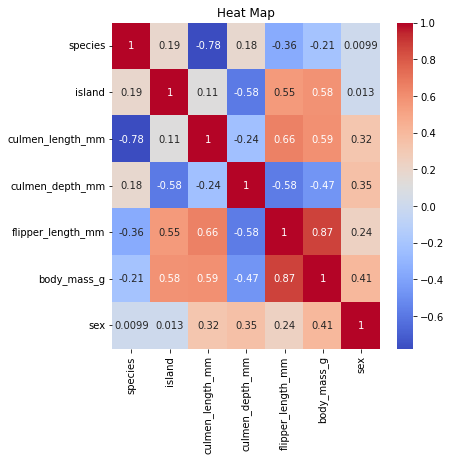

In [ ]:
fig=plt.figure()
fig,ax1=plt.subplots(figsize=(6,6))
ax1.set_title("Heat Map")
corr_matrix=peng_data.corr()
#print(corr_matrix)
correlation_heat_map=sb.heatmap(corr_matrix,annot=True,cmap="coolwarm")



<h3>IV. Dividing data into training and test set.</h3>
<p> > This can be done by first selecting input features and target variable. Based on the correlation graph above, 'SPECIES' variable can be excluded. <br>
    > I'm going to perform Binary Classification for gender(Male/Female). </p>

In [ ]:
inputs=peng_data.iloc[:,1:6]
target=peng_data['sex']
#print(inputs.shape,target.shape)
print(list(inputs.columns))

['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [ ]:
n1=len(peng_data)
_80=int((80*n1)/100)
_20=n1-_80
x_train=inputs.iloc[:_80]
x_test=inputs.iloc[:_20]
y_train=target.iloc[:_80]
y_test=target.iloc[:_20]

w=np.zeros((1,275))
x_train=np.array(x_train)
y_train=np.array(y_train)
y_train=y_train.reshape((275,1))
pd.DataFrame(y_train).value_counts()

1    141
0    134
dtype: int64

1

In [ ]:
input_nodes = x_train.shape[1]
alpha = 0.01

weights = np.ones((input_nodes,1))
for i in range(2):
  c = 0
  for i in range(x_train.shape[0]):
    y = x_train[i][0]*weights[0] + x_train[i][1]*weights[1] + x_train[i][2]*weights[2] + x_train[i][3]*weights[3] + x_train[i][4]*weights[4]
    
    l = 1/(1 + np.exp(-sum(y)))
    if l > 0.5:
      pred = 1
      c = c + 1
    else:
      pred = 0
    error = y_train[i] - pred
    weights = weights + 0.01 * error
  print("Accuracy Using Perceptron: ",(c/275)*100)


Accuracy Using Perceptron:  87.63636363636364
Accuracy Using Perceptron:  51.272727272727266


ACCUARACY when using Perceptron model is : 87.63<br>
ACCUARACY when using Logistic regression model is : 88.576

References:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a